### Simple UMAP example
This notebook shows you how to run a UMAP projection on the MNIST dataset, as well as plot the loss, and save the model.

### load data

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, Y_train), (test_images, Y_test) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], -1))/255.
test_images = test_images.reshape((test_images.shape[0], -1))/255.

### create parametric umap model

In [2]:
import sys
sys.path.append('../../')
from umap.parametric_umap import ParametricUMAP

In [3]:
embedder = ParametricUMAP(verbose=True)

In [4]:
embedding = embedder.fit_transform(train_images)

ParametricUMAP(optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x00000047CA632070>)
Construct fuzzy simplicial set
Fri Oct 16 12:59:49 2020 Finding Nearest Neighbors
Fri Oct 16 12:59:49 2020 Building RP forest with 17 trees
Fri Oct 16 12:59:56 2020 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Fri Oct 16 13:00:21 2020 Finished Nearest Neighbor Search
Fri Oct 16 13:00:26 2020 Construct embedding
Epoch 1/10
724/724 [==============================] - 25s 35ms/step - loss: 0.2258
Epoch 2/10
724/724 [==============================] - 25s 34ms/step - loss: 0.1756
Epoch 3/10
724/724 [==============================] - 25s 35ms/step - loss: 0.1584
Epoch 4/10
724/724 [==============================] - 25s 35ms/step - loss: 0.1493
Epoch 5/10
724/724 [==============================] - 25s 35ms/step - loss: 0.1430
Epoch 6/10
724/724 [==============================] - 27s 37ms/step - loss: 0.1387
Epo

### plot results

In [5]:
import matplotlib.pyplot as plt

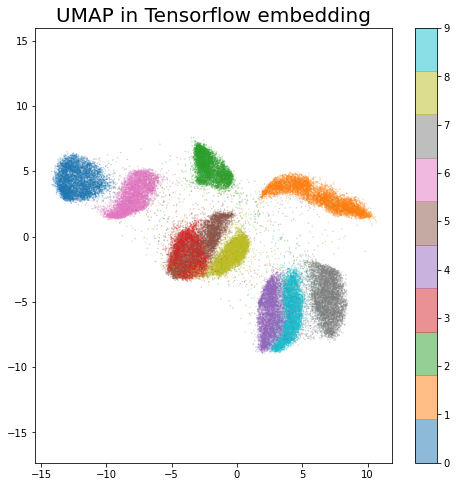

In [6]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=Y_train.astype(int),
    cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("UMAP in Tensorflow embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### plotting loss

In [7]:
embedder._history.keys()

dict_keys(['loss'])

Text(0.5, 0, 'Epoch')

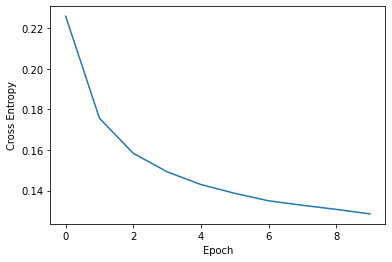

In [8]:
fig, ax = plt.subplots()
ax.plot(embedder._history['loss'])
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')

### saving and loading

In [9]:
from umap.parametric_umap import load_ParametricUMAP

In [10]:
embedder.save('/tmp/model')

/tmp/model\encoder
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/model\encoder\assets
Keras encoder model saved to /tmp/model\encoder
INFO:tensorflow:Assets written to: /tmp/model\parametric_model\assets
Keras full model saved to /tmp/model\parametric_model
Fri Oct 16 13:06:01 2020 Worst tree score: 0.60113333
Fri Oct 16 13:06:01 2020 Mean tree score: 0.60782157
Fri Oct 16 13:06:01 2020 Best tree score: 0.61548333
Fri Oct 16 13:06:09 2020 Forward diversification reduced edges from 900000 to 384270
Fri Oct 16 13:06:13 2020 Reverse diversification reduced edges from 384270 to 384270
Fri Oct 16 13:06:17 2020 Degree pruning reduced edges from 421110 to 421107
Fri Oct 16 13:06:17 2020 Resorting data and graph based on tree order
Fri Oct 16 13:06:17 2020 Compressing i

In [11]:
embedder = load_ParametricUMAP('/tmp/model')

Fri Oct 16 13:06:42 2020 Building and compiling search function
Pickle of ParametricUMAP model loaded from /tmp/model\model.pkl
Keras encoder model loaded from /tmp/model\encoder
Keras full model loaded from /tmp/model\parametric_model


In [13]:
embedder.encoder.save('/tmp/model/encoder.h5')